In [1]:
pip install praw

# Authentication

In [2]:
# PRAW Reddit instance with provided client credentials and a custom user agent for accessing Reddit's API.
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="4VjNBS1CFaF9YFdTIbJCqw",
    client_secret="OOri7aBZsFMn1q0UiMitHnTPz_AlRA",
    user_agent=user_agent
)

In [3]:
#importing li
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

# Get Trending Topic from your Subreddit

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("spotify").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Spotify Support/Complaint Megathread
184e989
whyisthissticky
1701015582.0
148
0.97
https://www.reddit.com/r/spotify/comments/184e989/spotify_supportcomplaint_megathread/
0


In [5]:
# The code retrieves unique titles of all hot submissions from the "bitcoin" subreddit using the PRAW Reddit instance and prints the total number of unique headlines.
headlines = set()
for submission in reddit.subreddit("spotify").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

497


In [6]:
#Create a dataframe from the scrapped data 
spotify_df = pd.DataFrame(headlines)
spotify_df.head()

,0
0,For when life tough and I need some good music...
1,anyone else’s personalized playlists absolutel...
2,marceline abadeer would probably like these songs
3,Heavy bass bangers
4,Instrumentals


In [7]:
# creates a new DataFrame "df" containing all rows and columns except the first column from the DataFrame "bitcoin_df".
df =spotify_df.iloc[:, 1:]
spotify_df.head()

,0
0,For when life tough and I need some good music...
1,anyone else’s personalized playlists absolutel...
2,marceline abadeer would probably like these songs
3,Heavy bass bangers
4,Instrumentals


In [8]:
spotify_df.columns

RangeIndex(start=0, stop=1, step=1)

In [9]:
spotify_df.columns = ['Titles']

In [10]:
spotify_df.head()

,Titles
0,For when life tough and I need some good music...
1,anyone else’s personalized playlists absolutel...
2,marceline abadeer would probably like these songs
3,Heavy bass bangers
4,Instrumentals


In [11]:
# calculating for the duplicate titles in the dataframe
spotify_df.Titles.duplicated().sum()

0

In [12]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
spotify_df["Titles"]= spotify_df["Titles"].apply(cleanTxt)

#Show the clean text
spotify_df.head()

,Titles
0,For when life tough and I need some good music...
1,anyone else’s personalized playlists absolutel...
2,marceline abadeer would probably like these songs
3,Heavy bass bangers
4,Instrumentals


In [13]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
spotify_df["Titles"]= spotify_df["Titles"].apply(remove_emoji)

#Show the clean text
spotify_df.head()

,Titles
0,For when life tough and I need some good music...
1,anyone else’s personalized playlists absolutel...
2,marceline abadeer would probably like these songs
3,Heavy bass bangers
4,Instrumentals


In [14]:
!pip install textblob

In [15]:
# Importing the `TextBlob` and wordcloud.
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [16]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
spotify_df['Subjectivity'] = spotify_df['Titles'].apply(getSubjectivity)
spotify_df['Polarity'] = spotify_df['Titles'].apply(getPolarity)

#Now display data
spotify_df.head()

,Titles,Subjectivity,Polarity
0,For when life tough and I need some good music...,0.716667,0.155556
1,anyone else’s personalized playlists absolutel...,0.900000,0.200000
2,marceline abadeer would probably like these songs,0.000000,0.000000
3,Heavy bass bangers,0.500000,-0.175000
4,Instrumentals,0.000000,0.000000


In [17]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
spotify_df["Insight"] = spotify_df["Polarity"].apply(getInsight)

spotify_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,For when life tough and I need some good music...,0.716667,0.155556,Positive
1,anyone else’s personalized playlists absolutel...,0.900000,0.200000,Positive
2,marceline abadeer would probably like these songs,0.000000,0.000000,Neutral
3,Heavy bass bangers,0.500000,-0.175000,Negative
4,Instrumentals,0.000000,0.000000,Neutral
5,Vocal Free Peaceful Piano - 826 Likes - Obviou...,0.533333,0.162500,Positive
6,"My Italian music fix, folded up nicely in this...",0.500000,0.300000,Positive
7,Morning Coffee & Cigarettes,0.000000,0.000000,Neutral
8,Guitar Legends Pink Floyd,0.300000,-0.100000,Negative
9,Post-breakup songs that boost your spirits?,0.000000,0.000000,Neutral


# Data Visualization

In [18]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

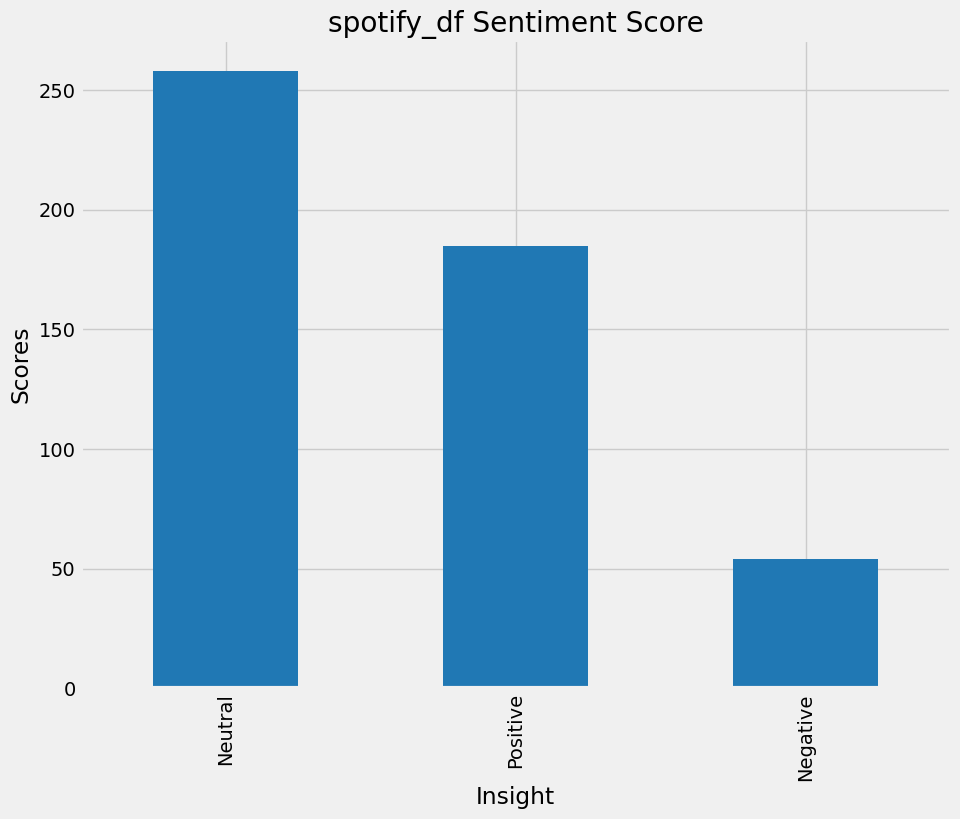

In [20]:
#Plot the values count of sentiment
plt.title("spotify_df Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
spotify_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

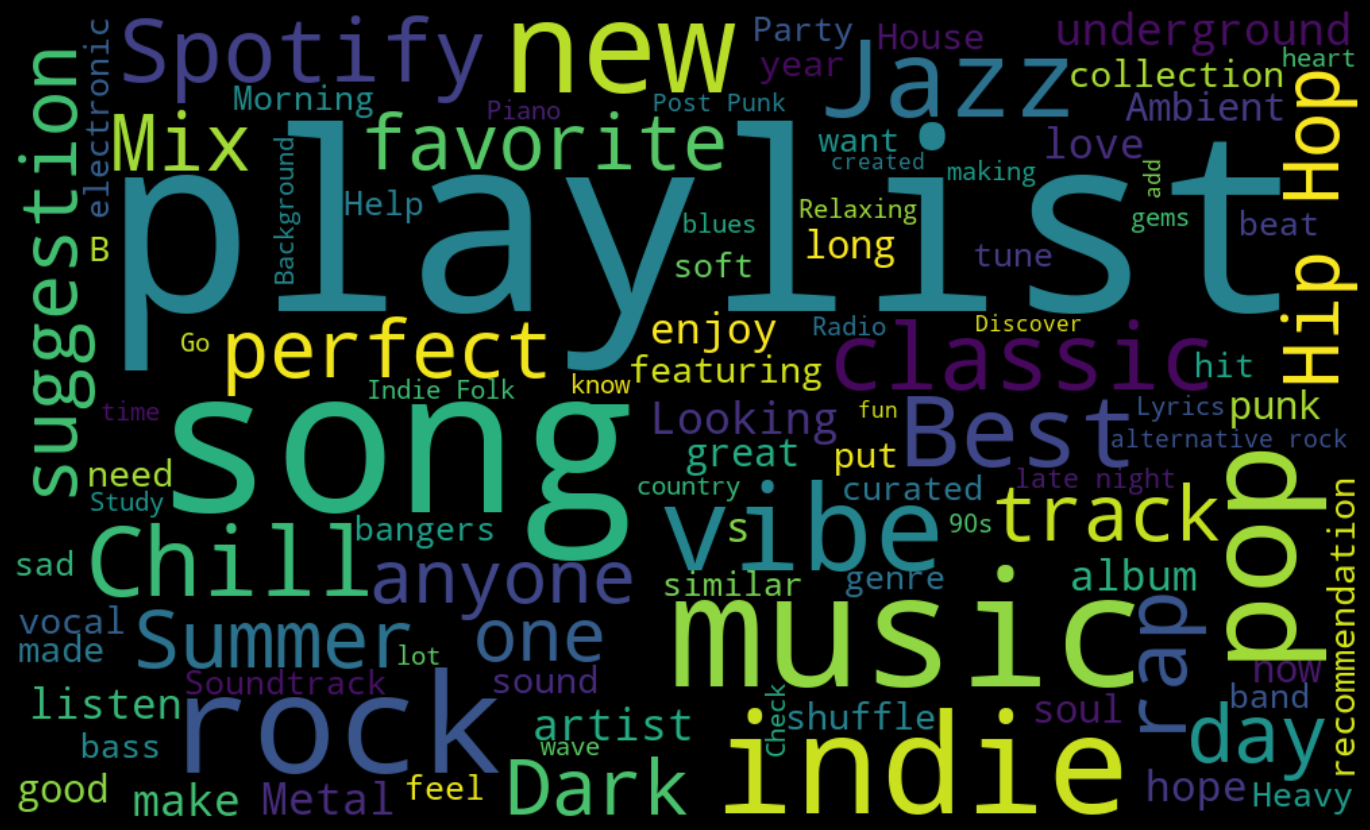

In [21]:
#Generating a word cloud visualization from the titles of Bitcoin-related articles.
text = ' '.join( [twts for twts in spotify_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");